In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("D:\Courses\Ml_AtoZ\Machine Learning-A-Z-Codes-Datasets\Machine Learning A-Z (Codes and Datasets)\Part 6 - Reinforcement Learning\Section 32 - Upper Confidence Bound (UCB)\Python\Ads_CTR_Optimisation.csv")

In [33]:
import math
N = 600
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    reward = dataset.values[n, ad]
    sums_of_rewards[ad] = sums_of_rewards[ad] + reward
    total_reward = total_reward + reward

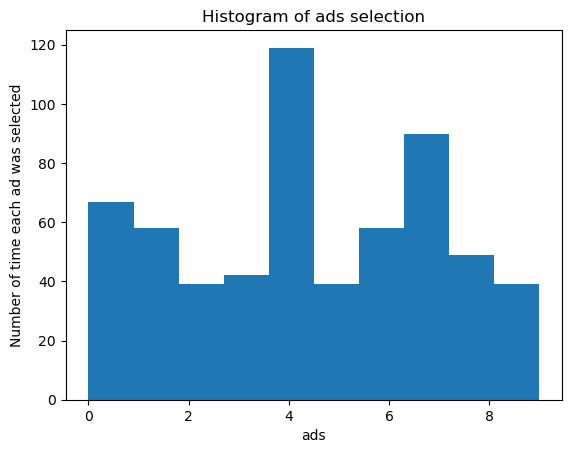

In [35]:
# visualization the results
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('ads')
plt.ylabel('Number of time each ad was selected')
plt.show()